<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
## Write your code here
# Display column names
print("Column names:")
print(df.columns.tolist())

# Display data types
print("\nData types:")
print(df.dtypes)

# Display summary info
print("\nSummary info:")
print(df.info())

# Display shape of the dataset
print(f"\nDataset shape: {df.shape}")

Column names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [5]:
## Write your code here

# Identify missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Option 1: Remove rows with missing values in critical columns (example: Employment, JobSat)
df_cleaned = df.dropna(subset=['Employment', 'JobSat'])

# Option 2: Fill missing values in less critical columns with 'Unknown'
df_cleaned = df_cleaned.fillna('Unknown')

# Check remaining missing values
print("\nRemaining missing values after cleaning:")

Missing values per column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Remaining missing values after cleaning:


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
## Write your code here

# Value counts for Employment
print("Employment value counts:")
print(df_cleaned['Employment'].value_counts())
print("\n")

# Value counts for JobSat (Job Satisfaction)
print("JobSat value counts:")
print(df_cleaned['JobSat'].value_counts())
print("\n")

# Value counts for YearsCodePro (Professional Coding Experience)
print("YearsCodePro value counts:")

Employment value counts:
Employment
Employed, full-time                                                                                                                    22537
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                2291
Independent contractor, freelancer, or self-employed                                                                                    1245
Employed, part-time                                                                                                                      534
Employed, full-time;Student, part-time                                                                                                   509
                                                                                                                                       ...  
Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employ

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


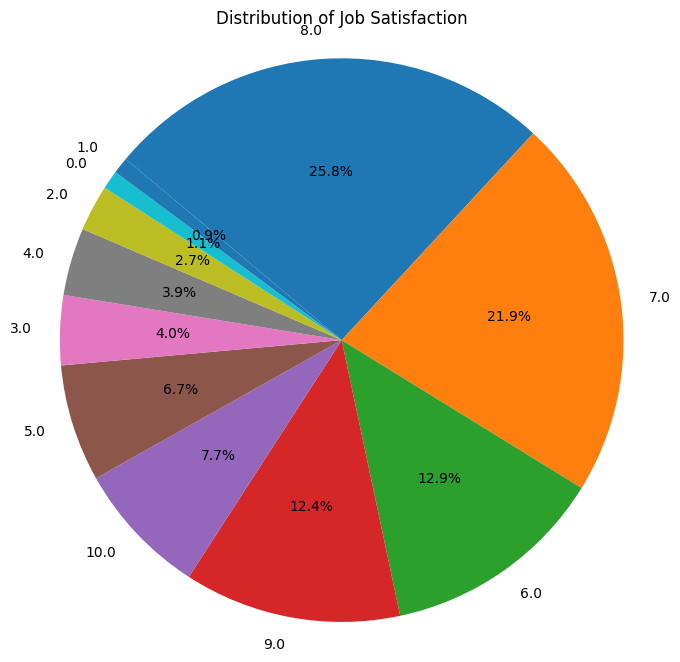

Interpretation:
The pie chart shows the proportion of respondents in each job satisfaction category. You can quickly identify which satisfaction levels are most and least common. For example, if 'Very satisfied' and 'Satisfied' slices are large, it indicates a generally positive sentiment among respondents. Conversely, larger 'Dissatisfied' or 'Very dissatisfied' slices would highlight areas of concern.


In [7]:
## Write your code here
## Write your code here

# Pie chart for JobSat distribution
job_sat_counts = df_cleaned['JobSat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title('Distribution of Job Satisfaction')
plt.axis('equal')
plt.show()

# Interpretation:
print("Interpretation:")
print("The pie chart shows the proportion of respondents in each job satisfaction category. You can quickly identify which satisfaction levels are most and least common. For example, if 'Very satisfied' and 'Satisfied' slices are large, it indicates a generally positive sentiment among respondents. Conversely, larger 'Dissatisfied' or 'Very dissatisfied' slices would highlight areas of concern.")

In [9]:
# Calculate the percentage of respondents with JobSat 7 or above

# First, ensure JobSat is numeric (if not, convert or filter as needed)
# If JobSat is already numeric, this will work directly
# If JobSat is categorical (e.g., 'Very satisfied'), you may need to map it to numbers

# Try to convert JobSat to numeric, coercing errors to NaN
df_cleaned['JobSat_num'] = pd.to_numeric(df_cleaned['JobSat'], errors='coerce')

# Count total valid JobSat responses
total = df_cleaned['JobSat_num'].notnull().sum()

# Count those with JobSat >= 7
above_7 = (df_cleaned['JobSat_num'] >= 7).sum()

# Calculate percentage
percent_above_7 = (above_7 / total) * 100

print(f"Percentage of respondents with JobSat 7 or above: {percent_above_7:.2f}%")

Percentage of respondents with JobSat 7 or above: 67.86%


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


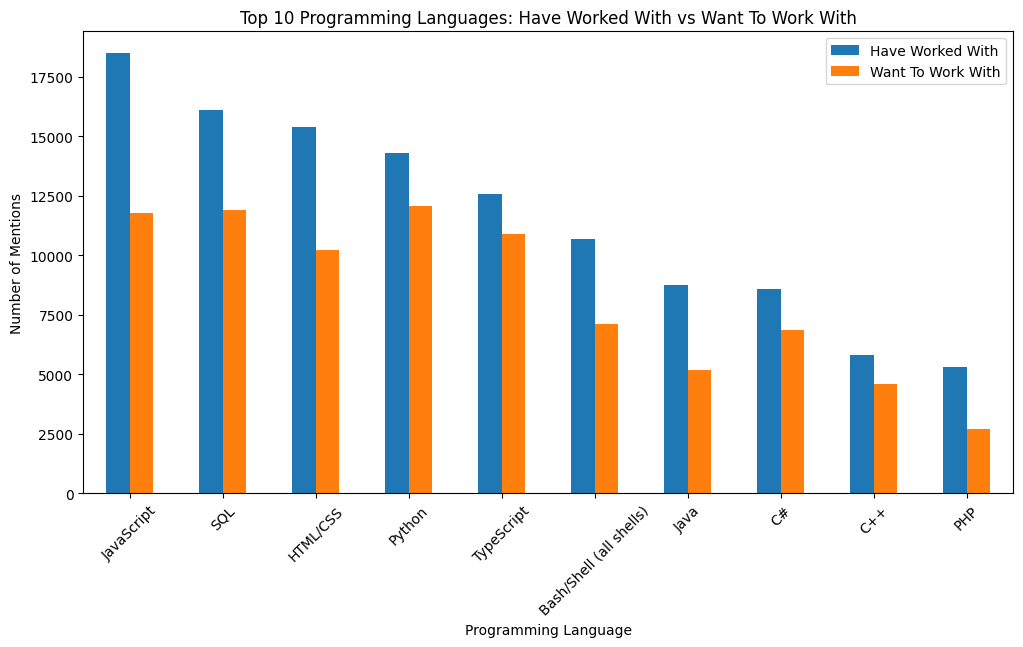

In [10]:
## Write your code here

# Split the language columns into lists
have_worked = df_cleaned['LanguageHaveWorkedWith'].dropna().str.split(';')
want_to_work = df_cleaned['LanguageWantToWorkWith'].dropna().str.split(';')

# Flatten the lists and count frequencies
from collections import Counter

have_worked_flat = [lang.strip() for sublist in have_worked for lang in sublist]
want_to_work_flat = [lang.strip() for sublist in want_to_work for lang in sublist]

have_worked_counts = Counter(have_worked_flat)
want_to_work_counts = Counter(want_to_work_flat)

# Create a DataFrame for comparison
lang_df = pd.DataFrame({
    'HaveWorkedWith': pd.Series(have_worked_counts),
    'WantToWorkWith': pd.Series(want_to_work_counts)
}).fillna(0)

# Sort by most common in 'HaveWorkedWith'
lang_df = lang_df.sort_values('HaveWorkedWith', ascending=False)

# Plot grouped bar chart for top 10 languages
top_n = 10
lang_df_top = lang_df.head(top_n)

lang_df_top.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Programming Languages: Have Worked With vs Want To Work With')
plt.ylabel('Number of Mentions')
plt.xlabel('Programming Language')
plt.xticks(rotation=45)
plt.legend(['Have Worked With', 'Want To Work With'])

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


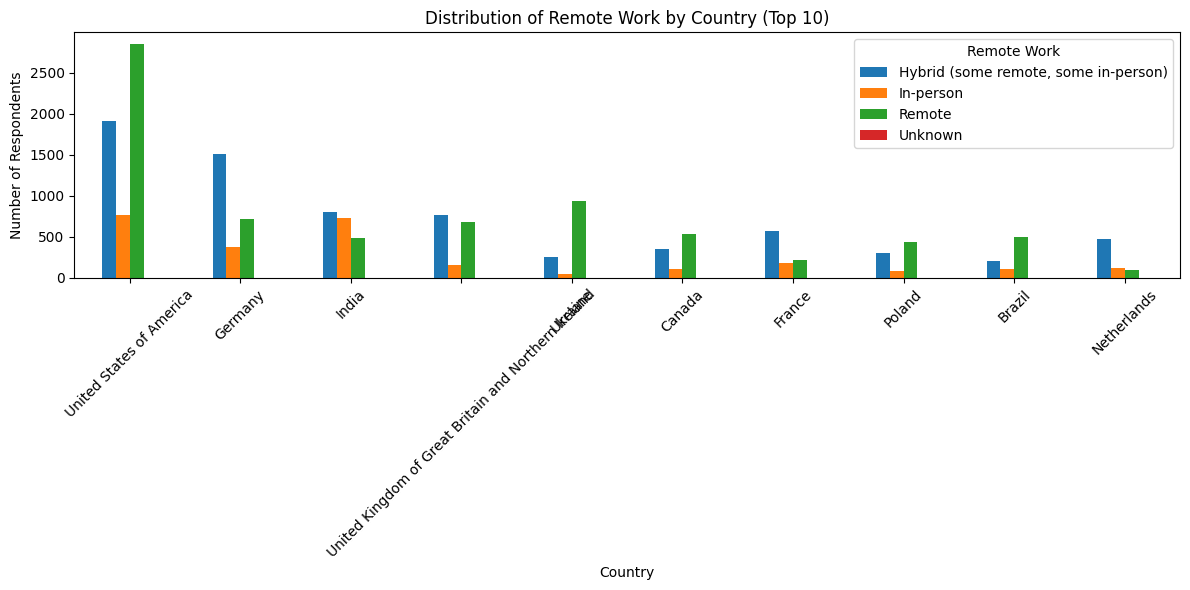

Text(0.5, 36.72222222222221, 'Remote Work')

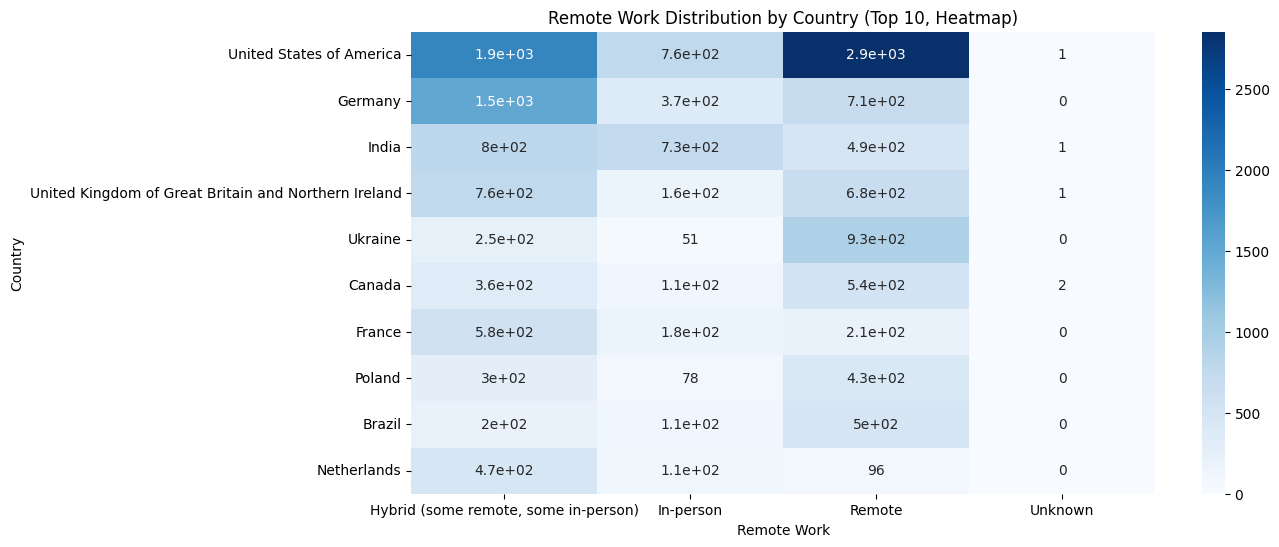

In [17]:
## Write your code here

# Group by Country and RemoteWork, then count occurrences
remote_country_counts = df_cleaned.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

# Get top 10 countries by total respondents
top_countries = remote_country_counts.sum(axis=1).sort_values(ascending=False).head(10).index
remote_top = remote_country_counts.loc[top_countries]

# Plot grouped bar chart for top 10 countries
remote_top.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Distribution of Remote Work by Country (Top 10)')
plt.ylabel('Number of Respondents')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Remote Work')
plt.tight_layout()
plt.show()

# Optional: Heatmap for top 10 countries
plt.figure(figsize=(12,6))
sns.heatmap(remote_top, annot=True, cmap='Blues')
plt.title('Remote Work Distribution by Country (Top 10, Heatmap)')
plt.ylabel('Country')
plt.xlabel('Remote Work')

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [19]:
## Write your code here

# Convert JobSat and YearsCodePro to numeric (coerce errors to NaN)
df_cleaned['JobSat_num'] = pd.to_numeric(df_cleaned['JobSat'], errors='coerce')
df_cleaned['YearsCodePro_num'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')

# Drop rows with missing values in either column
corr_df = df_cleaned.dropna(subset=['JobSat_num', 'YearsCodePro_num'])

# Calculate Pearson correlation coefficient
pearson_corr = corr_df['JobSat_num'].corr(corr_df['YearsCodePro_num'], method='pearson')
print(f"Pearson correlation coefficient between JobSat and YearsCodePro: {pearson_corr:.2f}")

# Calculate Spearman correlation coefficient
spearman_corr = corr_df['JobSat_num'].corr(corr_df['YearsCodePro_num'], method='spearman')
print(f"Spearman correlation coefficient between JobSat and YearsCodePro:) {spearman_corr:.2f}")

Pearson correlation coefficient between JobSat and YearsCodePro: 0.10
Spearman correlation coefficient between JobSat and YearsCodePro:) 0.12


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


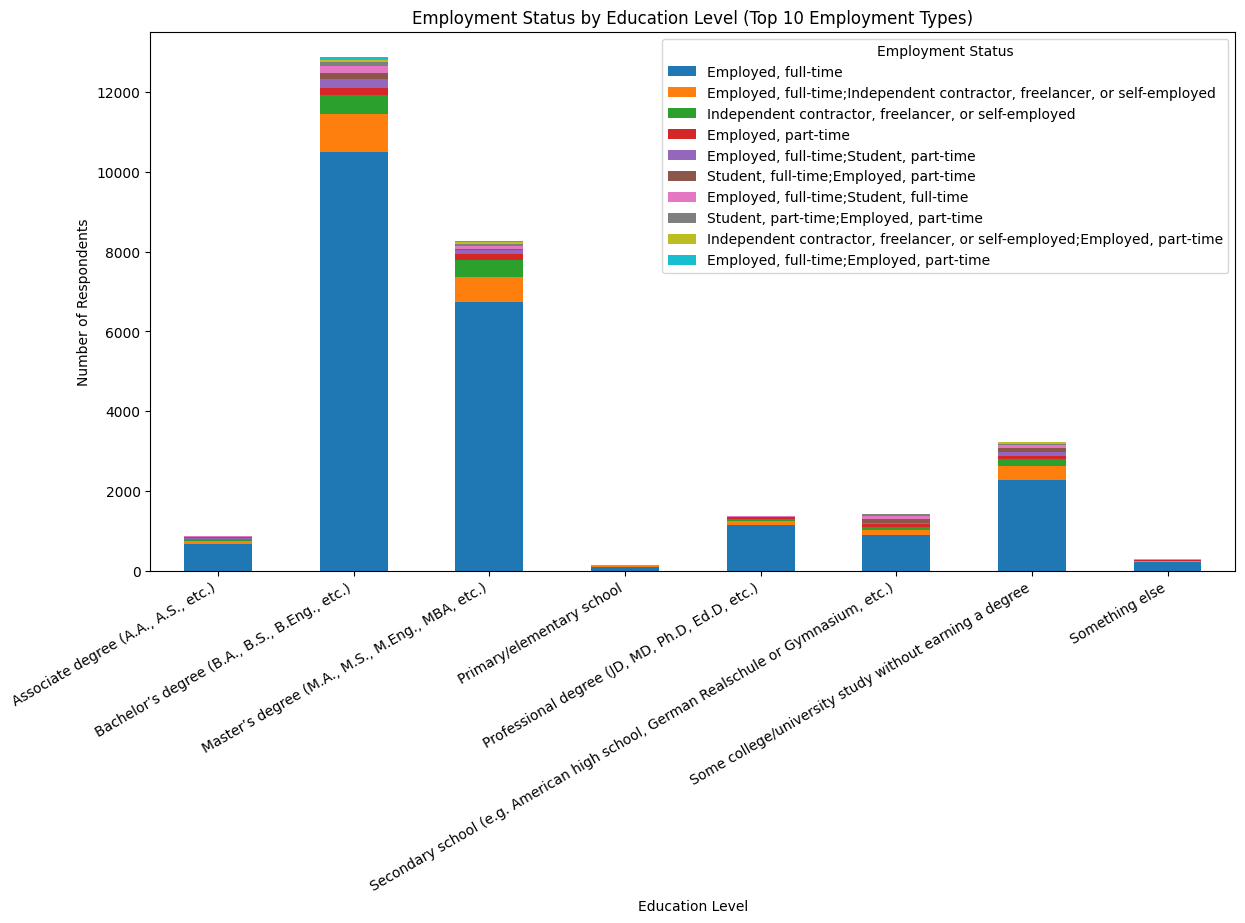

In [31]:
## Write your code here

# Create a cross-tabulation of Employment vs. EdLevel
employment_edlevel_ct = pd.crosstab(df_cleaned['EdLevel'], df_cleaned['Employment'])

# Select top 10 employment status by total respondents
top_employment = employment_edlevel_ct.sum(axis=0).sort_values(ascending=False).head(10).index
employment_edlevel_top = employment_edlevel_ct[top_employment]

# Plot stacked bar chart for top 10 employment status
employment_edlevel_top.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Employment Status by Education Level (Top 10 Employment Types)')
plt.ylabel('Number of Respondents')
plt.xlabel('Education Level')
plt.xticks(rotation=30, ha='right')  # <-- Fix alignment here
plt.legend(title='Employment Status')

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [33]:
## Write your code here

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_survey_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_survey_data.csv'")

Cleaned dataset saved as 'cleaned_survey_data.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
